In [59]:
import nltk
import spacy
import string
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,LancasterStemmer,WordNetLemmatizer
from nltk import pos_tag
from wordcloud import WordCloud

In [60]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [61]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [62]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>


False

In [63]:
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [64]:
nltk.download('omw-1.4')

[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [65]:
nlp = spacy.load("en_core_web_sm")

In [66]:
text = """Transformer is an exceptional innovation in the field of Deep Learning, contributed by Ashish
Vaswani et al. (2017), Google. The transformer is the most influential Neural Network model that has
shown outstanding performance on various NLP tasks including Machine Reading Comprehension,
Machine translation and sentence classification. Attention mechanism and parallelization are the
prominent features in the transformers. Consequently, it can facilitate long-range dependencies
without any gradient vanishing or gradient explosion problems and it overcomes the drawbacks of
the existing methods such as RNN and LSTM. The transformer is executed with an encoder-decoder
mechanism and the original article of transformers # “Attention All You Need”."""

In [67]:
sentences=sent_tokenize(text)
words=word_tokenize(text)

In [68]:
print('Sentence tokenizatio: ',sentences)
print('Word tokenization: ',words)

Sentence tokenizatio:  ['Transformer is an exceptional innovation in the field of Deep Learning, contributed by Ashish\nVaswani et al.', '(2017), Google.', 'The transformer is the most influential Neural Network model that has\nshown outstanding performance on various NLP tasks including Machine Reading Comprehension,\nMachine translation and sentence classification.', 'Attention mechanism and parallelization are the\nprominent features in the transformers.', 'Consequently, it can facilitate long-range dependencies\nwithout any gradient vanishing or gradient explosion problems and it overcomes the drawbacks of\nthe existing methods such as RNN and LSTM.', 'The transformer is executed with an encoder-decoder\nmechanism and the original article of transformers # “Attention All You Need”.']
Word tokenization:  ['Transformer', 'is', 'an', 'exceptional', 'innovation', 'in', 'the', 'field', 'of', 'Deep', 'Learning', ',', 'contributed', 'by', 'Ashish', 'Vaswani', 'et', 'al', '.', '(', '2017',

In [ ]:
stop_words = set(stopwords.words('english'))
words_filtered = [word for word in words if word.lower() not in stop_words]

In [70]:
words_no_punct = [word for word in words_filtered if word not in string.punctuation]
print("\nAfter Stopwords and Punctuation Removal:", words_no_punct)


After Stopwords and Punctuation Removal: ['Transformer', 'exceptional', 'innovation', 'field', 'Deep', 'Learning', 'contributed', 'Ashish', 'Vaswani', 'et', 'al', '2017', 'Google', 'transformer', 'influential', 'Neural', 'Network', 'model', 'shown', 'outstanding', 'performance', 'various', 'NLP', 'tasks', 'including', 'Machine', 'Reading', 'Comprehension', 'Machine', 'translation', 'sentence', 'classification', 'Attention', 'mechanism', 'parallelization', 'prominent', 'features', 'transformers', 'Consequently', 'facilitate', 'long-range', 'dependencies', 'without', 'gradient', 'vanishing', 'gradient', 'explosion', 'problems', 'overcomes', 'drawbacks', 'existing', 'methods', 'RNN', 'LSTM', 'transformer', 'executed', 'encoder-decoder', 'mechanism', 'original', 'article', 'transformers', '“', 'Attention', 'Need', '”']


In [71]:
word_freq = Counter(words_no_punct)
print("\nWord Frequency Distribution:", word_freq)


Word Frequency Distribution: Counter({'transformer': 2, 'Machine': 2, 'Attention': 2, 'mechanism': 2, 'transformers': 2, 'gradient': 2, 'Transformer': 1, 'exceptional': 1, 'innovation': 1, 'field': 1, 'Deep': 1, 'Learning': 1, 'contributed': 1, 'Ashish': 1, 'Vaswani': 1, 'et': 1, 'al': 1, '2017': 1, 'Google': 1, 'influential': 1, 'Neural': 1, 'Network': 1, 'model': 1, 'shown': 1, 'outstanding': 1, 'performance': 1, 'various': 1, 'NLP': 1, 'tasks': 1, 'including': 1, 'Reading': 1, 'Comprehension': 1, 'translation': 1, 'sentence': 1, 'classification': 1, 'parallelization': 1, 'prominent': 1, 'features': 1, 'Consequently': 1, 'facilitate': 1, 'long-range': 1, 'dependencies': 1, 'without': 1, 'vanishing': 1, 'explosion': 1, 'problems': 1, 'overcomes': 1, 'drawbacks': 1, 'existing': 1, 'methods': 1, 'RNN': 1, 'LSTM': 1, 'executed': 1, 'encoder-decoder': 1, 'original': 1, 'article': 1, '“': 1, 'Need': 1, '”': 1})


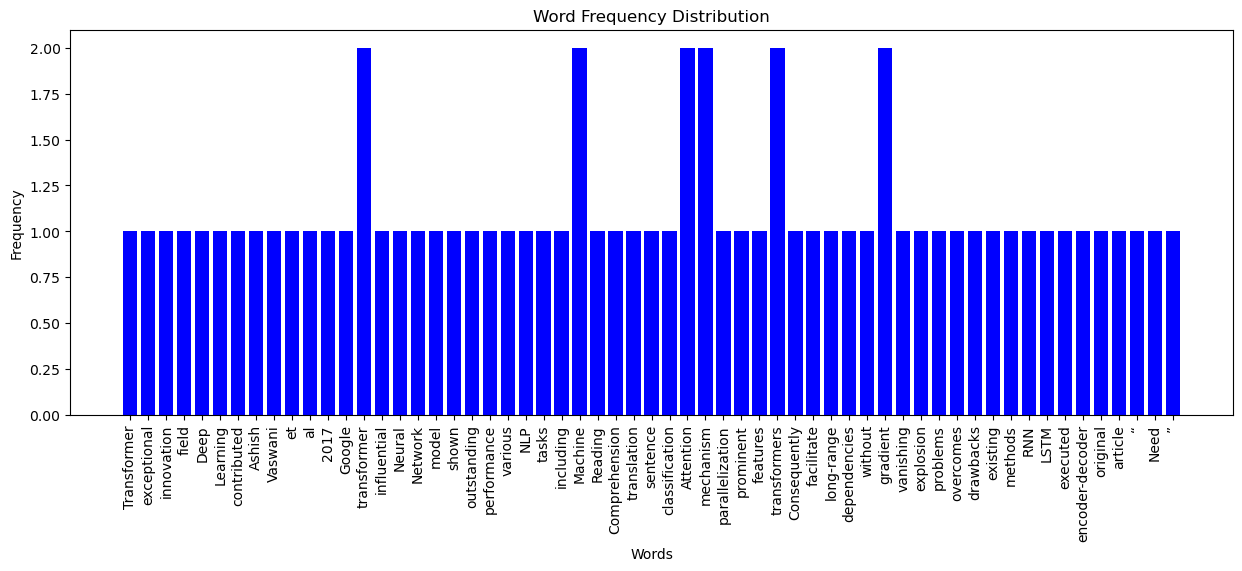

In [72]:
plt.figure(figsize=(15,5))
plt.bar(word_freq.keys(), word_freq.values(), color='blue')
plt.xticks(rotation=90)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution")
plt.show()

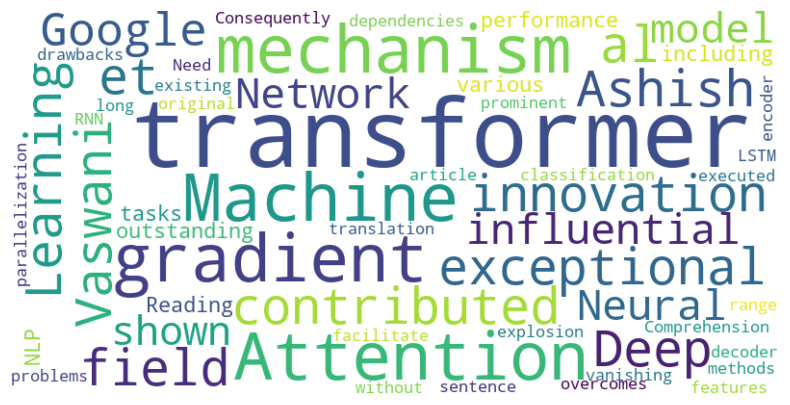

In [73]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(words_no_punct))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

In [75]:
stemmed_porter = [porter.stem(word) for word in words_no_punct]
stemmed_lancaster = [lancaster.stem(word) for word in words_no_punct]
lemmatized_words = [lemmatizer.lemmatize(word) for word in words_no_punct]

In [91]:
print("\nPorter Stemmer Output:", stemmed_porter)
print("\nLancaster Stemmer Output:", stemmed_lancaster)
print("\nLemmatization Output:", lemmatized_words)


Porter Stemmer Output: ['transform', 'except', 'innov', 'field', 'deep', 'learn', 'contribut', 'ashish', 'vaswani', 'et', 'al', '2017', 'googl', 'transform', 'influenti', 'neural', 'network', 'model', 'shown', 'outstand', 'perform', 'variou', 'nlp', 'task', 'includ', 'machin', 'read', 'comprehens', 'machin', 'translat', 'sentenc', 'classif', 'attent', 'mechan', 'parallel', 'promin', 'featur', 'transform', 'consequ', 'facilit', 'long-rang', 'depend', 'without', 'gradient', 'vanish', 'gradient', 'explos', 'problem', 'overcom', 'drawback', 'exist', 'method', 'rnn', 'lstm', 'transform', 'execut', 'encoder-decod', 'mechan', 'origin', 'articl', 'transform', '“', 'attent', 'need', '”']

Lancaster Stemmer Output: ['transform', 'exceiv', 'innov', 'field', 'deep', 'learn', 'contribut', 'ash', 'vaswan', 'et', 'al', '2017', 'googl', 'transform', 'influ', 'neur', 'network', 'model', 'shown', 'outstand', 'perform', 'vary', 'nlp', 'task', 'includ', 'machin', 'read', 'comprehend', 'machin', 'transl',

In [77]:
pos_tags = pos_tag(words_no_punct)
print("\nPoS Tagging:", pos_tags)


PoS Tagging: [('Transformer', 'NNP'), ('exceptional', 'JJ'), ('innovation', 'NN'), ('field', 'NN'), ('Deep', 'NNP'), ('Learning', 'NNP'), ('contributed', 'VBD'), ('Ashish', 'NNP'), ('Vaswani', 'NNP'), ('et', 'FW'), ('al', 'NN'), ('2017', 'CD'), ('Google', 'NNP'), ('transformer', 'NN'), ('influential', 'JJ'), ('Neural', 'NNP'), ('Network', 'NNP'), ('model', 'FW'), ('shown', 'VBN'), ('outstanding', 'JJ'), ('performance', 'NN'), ('various', 'JJ'), ('NLP', 'NNP'), ('tasks', 'NNS'), ('including', 'VBG'), ('Machine', 'NNP'), ('Reading', 'NNP'), ('Comprehension', 'NNP'), ('Machine', 'NNP'), ('translation', 'NN'), ('sentence', 'NN'), ('classification', 'NN'), ('Attention', 'NNP'), ('mechanism', 'NN'), ('parallelization', 'NN'), ('prominent', 'NN'), ('features', 'VBZ'), ('transformers', 'NNS'), ('Consequently', 'RB'), ('facilitate', 'VBP'), ('long-range', 'JJ'), ('dependencies', 'NNS'), ('without', 'IN'), ('gradient', 'NN'), ('vanishing', 'VBG'), ('gradient', 'JJ'), ('explosion', 'NN'), ('prob

In [78]:
doc = nlp(text)
print("\nNamed Entities:")
for ent in doc.ents:
    print(ent.text, " -> ", ent.label_)


Named Entities:
Transformer  ->  ORG
Deep Learning  ->  ORG
Ashish  ->  NORP
2017  ->  DATE
Google  ->  ORG
Neural Network  ->  ORG
NLP  ->  ORG
Machine Reading Comprehension  ->  ORG
RNN  ->  ORG


In [79]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
sentences = [
    "Transformers are the most important innovation in Deep Learning.",
    "The Transformer model by Vaswani et al. revolutionized NLP.",
    "Self-attention and parallelization make transformers efficient."
]

In [80]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)
print("\n🔹 Default Count Vectorizer:")
print(pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()))


🔹 Default Count Vectorizer:
   al  and  are  attention  by  deep  efficient  et  important  in  ...  \
0   0    0    1          0   0     1          0   0          1   1  ...   
1   1    0    0          0   1     0          0   1          0   0  ...   
2   0    1    0          1   0     0          1   0          0   0  ...   

   model  most  nlp  parallelization  revolutionized  self  the  transformer  \
0      0     1    0                0               0     0    1            0   
1      1     0    1                0               1     0    1            1   
2      0     0    0                1               0     1    0            0   

   transformers  vaswani  
0             1        0  
1             0        1  
2             1        0  

[3 rows x 23 columns]


In [81]:
vectorizer_maxdf1 = CountVectorizer(max_df=1)
X_maxdf1 = vectorizer_maxdf1.fit_transform(sentences)
print("\n🔹 Count Vectorizer with max_df=1:")
print(pd.DataFrame(X_maxdf1.toarray(), columns=vectorizer_maxdf1.get_feature_names_out()))


🔹 Count Vectorizer with max_df=1:
   al  and  are  attention  by  deep  efficient  et  important  in  ...  \
0   0    0    1          0   0     1          0   0          1   1  ...   
1   1    0    0          0   1     0          0   1          0   0  ...   
2   0    1    0          1   0     0          1   0          0   0  ...   

   learning  make  model  most  nlp  parallelization  revolutionized  self  \
0         1     0      0     1    0                0               0     0   
1         0     0      1     0    1                0               1     0   
2         0     1      0     0    0                1               0     1   

   transformer  vaswani  
0            0        0  
1            1        1  
2            0        0  

[3 rows x 21 columns]


In [82]:
vectorizer_maxdf2 = CountVectorizer(max_df=2)
X_maxdf2 = vectorizer_maxdf2.fit_transform(sentences)
print("\n🔹 Count Vectorizer with max_df=2:")
print(pd.DataFrame(X_maxdf2.toarray(), columns=vectorizer_maxdf2.get_feature_names_out()))


🔹 Count Vectorizer with max_df=2:
   al  and  are  attention  by  deep  efficient  et  important  in  ...  \
0   0    0    1          0   0     1          0   0          1   1  ...   
1   1    0    0          0   1     0          0   1          0   0  ...   
2   0    1    0          1   0     0          1   0          0   0  ...   

   model  most  nlp  parallelization  revolutionized  self  the  transformer  \
0      0     1    0                0               0     0    1            0   
1      1     0    1                0               1     0    1            1   
2      0     0    0                1               0     1    0            0   

   transformers  vaswani  
0             1        0  
1             0        1  
2             1        0  

[3 rows x 23 columns]


In [83]:
vectorizer_maxdf75 = CountVectorizer(max_df=0.75)
X_maxdf75 = vectorizer_maxdf75.fit_transform(sentences)
print("\n🔹 Count Vectorizer with max_df=0.75:")
print(pd.DataFrame(X_maxdf75.toarray(), columns=vectorizer_maxdf75.get_feature_names_out()))


🔹 Count Vectorizer with max_df=0.75:
   al  and  are  attention  by  deep  efficient  et  important  in  ...  \
0   0    0    1          0   0     1          0   0          1   1  ...   
1   1    0    0          0   1     0          0   1          0   0  ...   
2   0    1    0          1   0     0          1   0          0   0  ...   

   model  most  nlp  parallelization  revolutionized  self  the  transformer  \
0      0     1    0                0               0     0    1            0   
1      1     0    1                0               1     0    1            1   
2      0     0    0                1               0     1    0            0   

   transformers  vaswani  
0             1        0  
1             0        1  
2             1        0  

[3 rows x 23 columns]


In [84]:
vectorizer_mindf1 = CountVectorizer(min_df=1)
X_mindf1 = vectorizer_mindf1.fit_transform(sentences)
print("\n🔹 Count Vectorizer with min_df=1:")
print(pd.DataFrame(X_mindf1.toarray(), columns=vectorizer_mindf1.get_feature_names_out()))


🔹 Count Vectorizer with min_df=1:
   al  and  are  attention  by  deep  efficient  et  important  in  ...  \
0   0    0    1          0   0     1          0   0          1   1  ...   
1   1    0    0          0   1     0          0   1          0   0  ...   
2   0    1    0          1   0     0          1   0          0   0  ...   

   model  most  nlp  parallelization  revolutionized  self  the  transformer  \
0      0     1    0                0               0     0    1            0   
1      1     0    1                0               1     0    1            1   
2      0     0    0                1               0     1    0            0   

   transformers  vaswani  
0             1        0  
1             0        1  
2             1        0  

[3 rows x 23 columns]


In [85]:
vectorizer_mindf2 = CountVectorizer(min_df=2)
X_mindf2 = vectorizer_mindf2.fit_transform(sentences)
print("\n🔹 Count Vectorizer with min_df=2:")
print(pd.DataFrame(X_mindf2.toarray(), columns=vectorizer_mindf2.get_feature_names_out()))


🔹 Count Vectorizer with min_df=2:
   the  transformers
0    1             1
1    1             0
2    0             1


In [86]:
vectorizer_maxfeatures = CountVectorizer(max_features=3)
X_maxfeatures = vectorizer_maxfeatures.fit_transform(sentences)
print("\n🔹 Count Vectorizer with max_features=3:")
print(pd.DataFrame(X_maxfeatures.toarray(), columns=vectorizer_maxfeatures.get_feature_names_out()))



🔹 Count Vectorizer with max_features=3:
   al  the  transformers
0   0    1             1
1   1    1             0
2   0    0             1


In [87]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(sentences)
print("\n🔹 TF-IDF Vectorizer:")
print(pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out()))


🔹 TF-IDF Vectorizer:
         al       and       are  attention        by      deep  efficient  \
0  0.000000  0.000000  0.350139   0.000000  0.000000  0.350139   0.000000   
1  0.341426  0.000000  0.000000   0.000000  0.341426  0.000000   0.000000   
2  0.000000  0.389888  0.000000   0.389888  0.000000  0.000000   0.389888   

         et  important        in  ...     model      most       nlp  \
0  0.000000   0.350139  0.350139  ...  0.000000  0.350139  0.000000   
1  0.341426   0.000000  0.000000  ...  0.341426  0.000000  0.341426   
2  0.000000   0.000000  0.000000  ...  0.000000  0.000000  0.000000   

   parallelization  revolutionized      self       the  transformer  \
0         0.000000        0.000000  0.000000  0.266290     0.000000   
1         0.000000        0.341426  0.000000  0.259663     0.341426   
2         0.389888        0.000000  0.389888  0.000000     0.000000   

   transformers   vaswani  
0       0.26629  0.000000  
1       0.00000  0.341426  
2       0.29652